In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import random
import copy

# Eight Queens Problem with a Genetic Algorithm Approach

José Luis Lobera del Castillo & Rafael Andrade Ruíz Capetillo <br>
Optimización y Metahurísticas II <br>
Dra. Claudia Nallely Sánchez Gómez


In [2]:
# plot_solution(solution : list | array): void
# Plots an N*N board with squares representing the queens positions

def plot_solution(solution):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.set_xlim((0, 8))
    ax.set_ylim((0, 8))

    count = 0
    for queen in solution:
        ax.add_patch(plt.Rectangle((count, queen), 1, 1))
        count += 1
    plt.grid(True)
    plt.show(fig)

In [3]:
# getWeakpoints(x : int, y : int, N : int): list
# Returns the coordinates where other queens can't be placed

def getWeakpoints(x, y, N):

    weakpoints = []
    
    weakpoints += list(zip(range(0, x), [y]*x))                         # Left
    weakpoints += list(zip(range(x+1, N), [y]*(N-x)))                   # Right
    weakpoints += list(zip([x]*y, range(0, y)))                         # Down
    weakpoints += list(zip([x]*(N-y), range(y+1, N)))                   # Up

    
    weakpoints += list(zip(range(x-1, -1, -1), range(y-1, -1, -1)))     # Down Left
    weakpoints += list(zip(range(x+1, N), range(y+1, N)))               # Up Right
    weakpoints += list(zip(range(x-1, -1, -1), range(y+1, N)))          # Down Right
    weakpoints += list(zip(range(x+1, N), range(y-1, -1, -1)))          # Up Left

    return weakpoints

In [4]:
# isSafe(board : list | array, row : int, col : int, N=8 : int): bool
# Returns true if a queen isn't in the attack range of the other queens

def isSafe(board, row, col, N=8):
    queens = list(zip(range(N), board))
    weakpoints = getWeakpoints(row, col, N)
    
    for queen in queens:
        if queen in weakpoints:
            return False
  
    return True

In [5]:
# timesHitted(board : list | array, row : int, col : int, N=8): int
# Counts the amount of collisions between a position and the queens on board

def timesHitted(board, row, col, N=8):
    queens = list(zip(range(N), board))

    miniScore = 0
    weakpoints = getWeakpoints(row, col, N)
    for queen in queens:
        if queen in weakpoints:
            miniScore += 1
  
    return miniScore

In [6]:
# objectiveFunction(solution : list | array): int
# Returns a score which represents the amount of safe queens on board

def objectiveFunction(solution):
    scoreSum = 0
    for i, queen in enumerate(solution):
        #scoreSum += timesHitted(solution, i, queen)
        if isSafe(solution, i, queen):
            scoreSum += 1
    return scoreSum

In [7]:
# GetRandomChromosome(n = int): list
# Returns a random permutation of an N range, which represents N placed queens on board

def GetRandomChromosome(n):
    chromosome = np.random.permutation(np.arange(n))
    score = objectiveFunction(chromosome)
    return [chromosome, score]

In [8]:
# getPopulation(populationSize : int, chromosomeSize : int): list<list>
# Returns a list of chromosomes
    
def getPopulation(populationSize, chromosomeSize):
    return [GetRandomChromosome(chromosomeSize) for _ in range(populationSize)]

In [9]:
# TournamentSelection(population : list<list> | array<array>, k=2: int): list | array
# Returns a random chromosome from the community of k members of the population

def TournamentSelection(population, k=2):
    community = random.sample(population, k)
    localElite = community[0]
    
    for chromosome in community:
        if chromosome[1] >= localElite[1]:
            localElite = chromosome
            
    return localElite

In [10]:
# getElite(A : list | array, B : list | array): list | array
# Returns the chromosome with the highest score (Chromosome[1])

def getElite(A, B):
    if A is None: return B
    if B is None: return A
    
    if A[1] >= B[1]:
        return A
    else:
        return B

In [11]:
# pointCrossover(A : list | array, B : list | array, reproductionProbability : float, N : int): list | array
# If the probability of reproduction appears, two chromosomes will be splited and joined to create a new

def pointCrossover(A, B, reproductionProbability, N):

    if random.random() <= reproductionProbability:
        
        crosspoint = random.randint(0, N-1)
        C = np.concatenate((A[0][:crosspoint], B[0][crosspoint:]), axis=0)
        score = objectiveFunction(C)
        return [C, score]
        
    else:
        return copy.deepcopy(A)

In [12]:
# mutation(C : list | array, mutationProbability : float, N: int): void\n",
# If the probability of mutation appears, a random gene will be changed from the chromosome

def mutation(C, mutationProbability, N):
    if random.random() <= mutationProbability:
        mutatedGeneIdx = random.randint(0, N-1)
        C[0][mutatedGeneIdx] = random.randint(0, N-1)
        C[1] = objectiveFunction(C[0])

In [15]:
# geneticAlgorithm(noQueens : int, populationSize : int, generations : int
#   reproductionProbability : float, mutationProbability : float): list

def geneticAlgorithm(noQueens, populationSize, generations, reproductionProbability, mutationProbability):
    eliteIndividual = None

    fatherPopulation = getPopulation(populationSize, 8) # First Gen
    sonPopulation = []

    actualGeneration = 0

    while actualGeneration < generations: # OR we haven't found a good solution
        
        for _ in range(populationSize):
            G11 = TournamentSelection(fatherPopulation)
            G12 = TournamentSelection(fatherPopulation)

            G21 = pointCrossover(G11, G12, reproductionProbability, noQueens)
            mutation(G21, mutationProbability, noQueens)

            sonPopulation.append(G21)
            
            eliteIndividual = getElite(G21, eliteIndividual)
        
        fatherPopulation = sonPopulation
        sonPopulation = []

        actualGeneration += 1
    
    return eliteIndividual

### Test Case

In [22]:
noQueens = 8
populationSize = 100
generations = 100
reproductionProbability = 0.8
mutationProbability = 0.2

result = geneticAlgorithm(noQueens, populationSize, generations, reproductionProbability, mutationProbability)

Score:  8 Queens


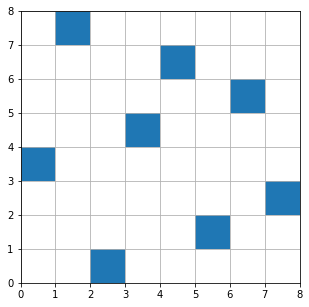

In [23]:
print('Score: ', result[1], 'Queens')
plot_solution(result[0])